## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [35]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head(10)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [4]:
df.user_id.nunique()

290584

In [5]:
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [6]:
df['converted'].mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [7]:
df.group.unique()

array(['control', 'treatment'], dtype=object)

In [8]:
df.landing_page.unique()

array(['old_page', 'new_page'], dtype=object)

In [9]:
con_new = df.query('group =="control" and landing_page == "new_page"').count()[0]
treat_old = df.query('group == "treatment" and landing_page == "old_page"').count()[0]
con_new + treat_old

3893

f. Do any of the rows have missing values?

In [10]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [11]:
# The values for "group" and "landing_page" being aligned with each other 
temp_df = df.query('group =="control" and landing_page == "old_page"')
df2 = temp_df.append(df.query('group == "treatment" and landing_page == "new_page"'))
df2.group.unique()

array(['control', 'treatment'], dtype=object)

In [12]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [13]:
df2.user_id.nunique()

290584

In [14]:
df2.shape

(290585, 5)

b. There is one **user_id** repeated in **df2**.  What is it?

In [15]:
df2[df2.duplicated(subset = ['user_id'])].user_id.unique()


array([773192])

c. What is the row information for the repeat **user_id**? 

In [16]:
df2[df2.duplicated(subset = ['user_id'], keep = False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [17]:
df2 = df2.drop_duplicates(subset = ['user_id'])

In [18]:
df2.shape[0]

290584

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [19]:
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [20]:
df2.groupby(['group']).mean()

,user_id,converted
group,,
control,788164.072594,0.120386
treatment,787845.719290,0.118808


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [21]:
df2.groupby(['group']).mean()

,user_id,converted
group,,
control,788164.072594,0.120386
treatment,787845.719290,0.118808


d. What is the probability that an individual received the new page?

In [22]:
(df2['landing_page'] == "new_page").mean()

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

> The converting rate for the old_page **(0.1204)** is a bit higher than new_page **(0.1188)** by **0.0016**. That's a very small difference to say that the new page made an impact and converts from old to new. 
> And the probability that individual receive the new page is about **50%** probability, which is almost half of the users receive the old page and the other half receive the new page. 

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

1- Null hypotheses : **$p_{new}$** - **$p_{old}$** <= 0 as if it's equal or less than 5%, the old page has a higher probability to converting

2- Alternative hypotheses : **$p_{new}$** - **$p_{old}$** >0 as if it's greater than 5%, the new page has the higher percenage to convert 

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [23]:
p_new = df2[df2['converted'] == 1]['user_id'].count()/df2['converted'].count()
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [38]:
p_old = df['converted'].mean()
p_old

0.11965919355605512

c. What is $n_{new}$?

In [39]:
n_new = df2[df2['landing_page'] == 'new_page']['user_id'].count()
n_new

145310

d. What is $n_{old}$?

In [59]:
n_old = df2[df2['landing_page'] == 'old_page']['user_id'].count()
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [60]:
#new_page_converted = np.random.choice(2, size = n_new, p = [p_new, 1-p_new])
#np.array(new_page_converted)

array([1, 1, 1, ..., 1, 1, 1])

In [61]:
new_page = np.random.binomial(n_new, p_new)
new_page

17229

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [62]:
#old_page_converted = np.random.choice(2, size = n_old, p = [p_old, 1-p_old])
#old_page_converted

array([1, 1, 1, ..., 1, 1, 1])

In [63]:
old_page = np.random.binomial(n_old, p_old)
old_page

17451

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [64]:
diff_bin = (new_page/n_new) - (old_page/n_old)
diff_bin

-0.0015575286647412506

In [58]:
#diff_choice = (new_page_converted.mean()) - (old_page_converted.mean())
#diff_choice

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [65]:
# 10000 simulation for the p differance :
p_diffs =[]
for i in range (10000):
    new_convertion = np.random.binomial(n_new, p_new)
    old_convertion = np.random.binomial(n_old, p_old)
    diffs = (new_convertion/n_new) - (old_convertion/n_old)
    p_diffs.append(diffs)
p_diffs = np.array(p_diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

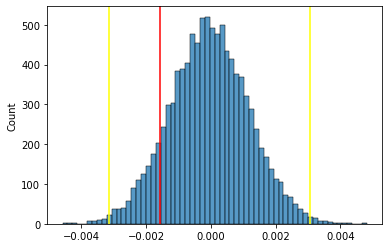

In [66]:
low, high = np.percentile(p_diffs, .5), np.percentile(p_diffs, 99.5)
low, high
sns.histplot(p_diffs)
plt.axvline(diff_bin, color = 'red')
plt.axvline(x=high, color='yellow')
plt.axvline(x=low, color='yellow')

In [ ]:
#plt.hist(p_diffs)
#plt.axvline(diff_choice, color = 'red')
#plt.axvline(x=high, color='yellow')
#plt.axvline(x=low, color='yellow')

The histogram looks like what I expeacted. According to Confidence Interval, almost most of the data points fall within the area of .5 and 99.5, which indicate that the null hypothesized did the statistics. 

From the histogram we notice that more than the half - starting from the red line - of the distribution fall within the rang and support the null hypothesis that the old landing page do better convert. 

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [78]:
act_control = df2.query('group == "control"')['converted']
act_treatment = df2.query('group == "treatment"')['converted']
act_diffs = (act_treatment.mean()) - (act_control.mean())
act_diffs

-0.0015782389853555567

In [79]:
(p_diffs > act_diffs).mean()

0.8967

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**P-Value**

`Type I error`: means the changes that been made are unnecessary and waste of time. In other words, it shows the new landing page -as the alternaive hypothesis- is better while the truth is the old landing page is much better. 

`Type II error`: means the changes stay the same as it's needed. Here it shows the old landing page - as the null hypothesis- is better, but in reality the new landing page is way better. 

> So what we got in the **Q.J** is called the **P-Value** 

- If p-value <= 0.05 then it's evidence to reject the null hypothesis
- If p-value >  0.05 then it's evidence to accept the null hypothesis

> As the p-value (~0.90) is slightly bigger, which it means that a small statistical evidance - Type I error- that the new langing page do not convert better, which lead to stay with the old landing page

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [72]:
import statsmodels.api as sm

conv_old = len(df2.query('landing_page == "old_page" and converted == 1'))
conv_new = len(df2.query('landing_page == "new_page" and converted == 1'))
n_old = len(df2.query('landing_page == "old_page"'))
n_new = len(df2.query('landing_page == "new_page"'))

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [75]:
#https://pro.arcgis.com/en/pro-app/latest/tool-reference/spatial-statistics/what-is-a-z-score-what-is-a-p-value.htm
#https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html
z_score, p_value = sm.stats.proportions_ztest([conv_old, conv_new], [n_old, n_new], value = None, 
                                              alternative = 'larger', prop_var = False)
z_score, p_value

(1.3109241984234394, 0.09494168724097551)

In [77]:
z_score1, p_value1 = sm.stats.proportions_ztest([conv_old, conv_new], [n_old, n_new], value = None, 
                                              alternative = 'smaller', prop_var = False)
z_score1, p_value1

(1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

In [81]:
from scipy.stats import norm


In [83]:
#critical value for z_score
norm.ppf(1-(0.05/2))

1.959963984540054

z_score measures the std and p_value measures the probability and both are associated with the standard normal distribution. As we see that the p_value is almost the same the previous p_value in point **j** as **~0.90**. And the z_score is less than the critical value and confidence level of 95%. With those two variable of z_score and p_value support the same result of pur previous conclusion that the old landing page is statisically better than the new one, and we fall to reject the null hypothesis. 

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

https://careerfoundry.com/en/blog/data-analytics/what-is-logistic-regression/

> There are 3 types of regression: 

* Simple Linear: used to estimate the relationship between two quantitative variables. 
* Multiple Linear: used to estimate the relationship between two or more independent variables and one dependent variable.
* Logistic: used to figure binary outcome when the dependent variable(target) is categorical

>> So as we our statistic on the (converted) column, and the outcome are even **1 or 0** then best regression type will be the **Logistic** type.   

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [84]:
# add the intercept column and check
df2['intercept'] = 1
df2.head(3)

,user_id,timestamp,group,landing_page,converted,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1


In [95]:
# add the ab_page column with dummy variable so treatment = 1 and control = 0
df2[['temp', 'ab_page']] = pd.get_dummies(df2['group'])
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [109]:
# drop the temp column
df2= df2.drop('temp', axis =1)
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0
5,936923,2017-01-10 15:20:49.083499,control,old_page,0,1,0
7,719014,2017-01-17 01:48:29.539573,control,old_page,0,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [110]:
from scipy import stats
#https://medium.com/@dominykastunaitis/from-scipy-import-stats-stats-chisqprob-lambda-chisq-df-stats-chi2-sf-chisq-df-7e484ff5b41
stats.chisqprob = lambda chisq, df2: stats.chi2.sf(chisq, df2)

In [111]:
#https://realpython.com/logistic-regression-python/
logistic_model= sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
result= logistic_model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [112]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Thu, 25 Mar 2021   Pseudo R-squ.:               8.077e-06
Time:                        22:47:57   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

> P_value that associated with **ab_page** = **0.19**. This p_value is higher than **0.05**, it leads to the conclusion of fall to reject the null hypothesis. 

>There is a differance between the p_value of the logistic type **(0.19)** and the p_value of the previous type in part II **(0.9)**. 

>In part II the null hypothesis was that convertion of the old page is higher than the new page. And the alternative would be the opposite as the new page would be higher. So we were identified it with average conversion between the old pag and the new page upon the users population that's greater than our obeserved statistic. However, the logistic regression evaluating the convertion rate differ by visited page, so it show if there is an effect on the users conversion rate or the alternative that the both landing page don't euqal (0). Also the z-score was one side test, on other hand the regression is both sided test


f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

> We will never know if our previous result is the ultimate right for why users choose one page over the other. There might have some other reason/s that lead the user to choose a certian page that need to be taking into account to be able to know which page is the best on all sides, and by adding other variable to the equation we be reduce the biases results.

> There might be disadvantages when we add other factors, we might face the Simpson's paradox, increase the complexity, reduce the power of the analysis, or lead to unreliable estimates of regression coeffientss which affect the model and we lose the degree of freedom. 

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [113]:
#check countries.csv 
countrydf = pd.read_csv('./countries.csv')
countrydf.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [114]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [115]:
# check unique countries
df_new['country'].unique()

array(['UK', 'US', 'CA'], dtype=object)

In [116]:
df_new['intercept'] = 1

In [117]:
### Create the necessary dummy variables
df_new[['CA','UK', 'US']]= pd.get_dummies(df_new['country'])
df_new.head(10)

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0
909908,UK,2017-01-06 20:44:26.334764,treatment,new_page,0,1,1,0,1,0
811617,US,2017-01-02 18:42:11.851370,treatment,new_page,1,1,1,0,0,1
938122,US,2017-01-10 09:32:08.222716,treatment,new_page,1,1,1,0,0,1
887018,US,2017-01-06 11:09:40.487196,treatment,new_page,0,1,1,0,0,1


In [121]:
## drop US (baseline)
df_new = df_new.drop('US', axis = 1)
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK
user_id,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1


In [125]:

logit_mod = sm.Logit(df_new['converted'], df_new[['intercept','ab_page', 'CA', 'UK']])
results = logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Thu, 25 Mar 2021   Pseudo R-squ.:               2.323e-05
Time:                        23:05:07   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
CA            -0.0408      0.027     -1.516      0.130      -0.093       0.012
UK             0.0099      0.013      0.743      0.457      -0.016       0.036
==============================================================================
"""

> From what p_value show that all variable are way higher from the threshold 0.05 so that do not affect the conversion rate for the users. It means that the country doesn't add significant reasoning for the users preference. 

In [126]:
# compare to US conversion
1/np.exp(-0.0408), np.exp(0.0099), np.exp(-0.0149)

(1.0416437559600236, 1.0099491671175422, 0.9852104557227469)

> CA is 1.042 less to convert and UK is 1.0099 would highly convert 

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [130]:
### Fit Your Linear Model And Obtain the Results
df_new['page_UK'] = df_new['ab_page'] * df_new['UK']
df_new['page_CA'] = df_new['ab_page'] * df_new['CA']

df_new.head(3)

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,page_UK,page_CA
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,0,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,1,0


In [133]:
mod = sm.Logit(df_new['converted'], df_new[['intercept','ab_page', 'UK', 'page_UK', 'CA', 'page_CA' ]])
results = mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Thu, 25 Mar 2021   Pseudo R-squ.:               3.482e-05
Time:                        23:30:16   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9865      0.010   -206.344      0.000      -2.005      -1.968
ab_page       -0.0206      0.014     -1.505      0.132      -0.047       0.006
UK            -0.0057      0.019     -0.306      0.760      -0.043       0.031
page_UK        0.0314      0.027      1.181      0.238      -0.021       0.084
CA            -0.0175      0.038     -0.465      0.642      -0.091       0.056
page_CA       -0.0469      0.054     -0.872      0.383      -0.152       0.059
==============================================================================
"""

> Even after we create an interaction between page and country to see if there significant effects on conversion, the **p_value** for all of them are way higher than **0.05** the threshold. 


In [134]:
np.exp(results.params)

intercept    0.137178
ab_page      0.979646
UK           0.994272
page_UK      1.031896
CA           0.982625
page_CA      0.954198
dtype: float64

> There a small differance between all the country and page interaction and it seems like users in US are 1.03 more likely to convert to new page than UK users, however, it's a small differance. 

<a id='conclusions'></a>
## Conclusions

- Although the two different methods we used in this case, all show failuer of rejecting the null hypothesis.
- No significant evidance that the new page has better conversion than the old page, it show almost the same chances of converting the users and old page a little bit higher.
- No stong evidence that the country variable add much of influence on the conversion rate. 
- Taking all the previous in mind, actual difference observed test, the z-score test, and logistic regression model, it won't be recommented to work on the new page yet to save money and time. 

